In [1]:
import numpy as np
# Remove the following line after first run!
#%pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt  

# Create the input and output linguistic variables
- Funding will be an input between 0% and 100%
- Staffing will be an input between 0% and 100%
- Risk will be the output between 0% and 100%

In [13]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
funding = ctrl.Antecedent(np.arange(0, 100, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 100, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 100, 1), 'risk')

# Create the Funding input variable
We will split this linguistic variable into three terms inadequate, marginal,adequate. 
- inadequate -> trapezoid
- marginal -> triangle
- adequate -> trapezoid

A trapezoid is defined by four values x1, x2, x3, and x4. 
A triangle is defined by three values x1, x2, and x3.

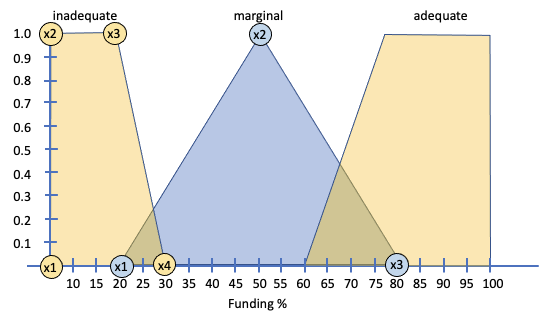

In [14]:
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 20, 30])
funding['marginal'] = fuzz.trimf(funding.universe, [20, 50, 80])
funding['adequate'] = fuzz.trapmf(funding.universe, [60, 80, 100, 100])

# Create the Staffing input variable
We will split this linguistic variable into two terms small and large
- small -> trapezoid
- large -> trapezoid

In [15]:
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 30, 57])
staffing['large'] = fuzz.trapmf(staffing.universe, [40, 60, 100, 100])

# Create the Risk output variable
We will split this linguistic variable into three terms low, normal and high
- low -> trapezoid
- normal -> triangle
- high -> trapezoid

In [16]:
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trimf(risk.universe, [20, 50, 80])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

# View the linguistic variables

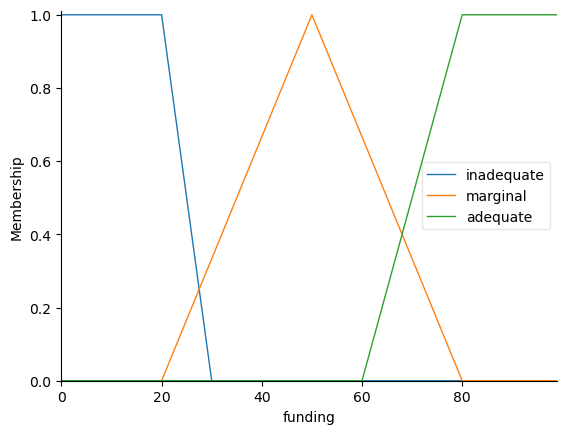

In [17]:
funding.view()

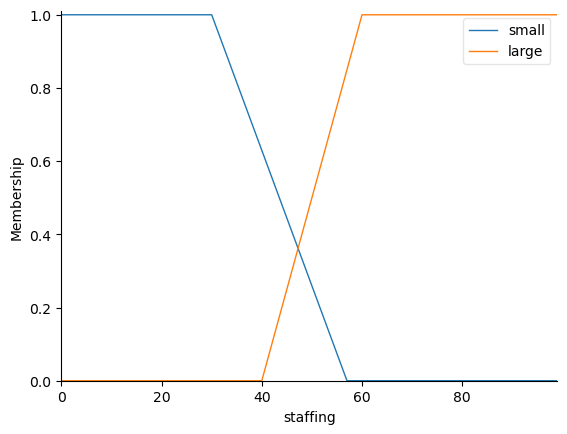

In [18]:
staffing.view()

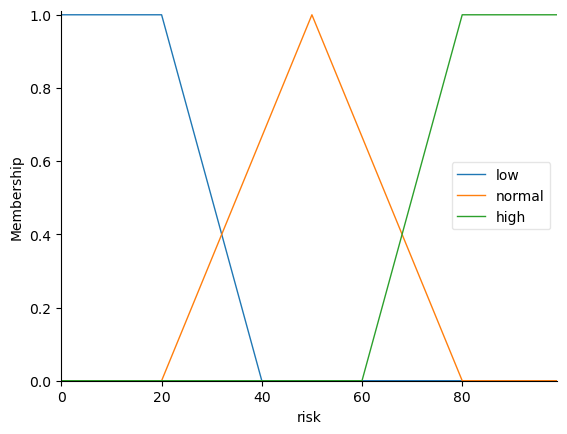

In [19]:
risk.view()

# Create the rules to determine the project risk
- RULE 1: if the project funding is adequate and staffing requirement is small, then the risk is low
- RULE 2: if the project funding is marginal and staffing requirement is large, then the risk is normal
- RULE 3: if the project funding is inadequate, then the risk is high

In [26]:
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])

# Add the rules to the system

In [27]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
project_risk = ctrl.ControlSystemSimulation(risk_ctrl)

# Load up some test inputs and run the system
We will test the system with funding of 25% and a staffing requirement of 55%

In [29]:
project_risk.input['funding'] = 25
project_risk.input['staffing'] = 55

# Crunch the numbers
project_risk.compute()

# Get the defuzzified crisp output from the system
We can visualise the combined rule output and the defuzzified output value

67.07050809109242


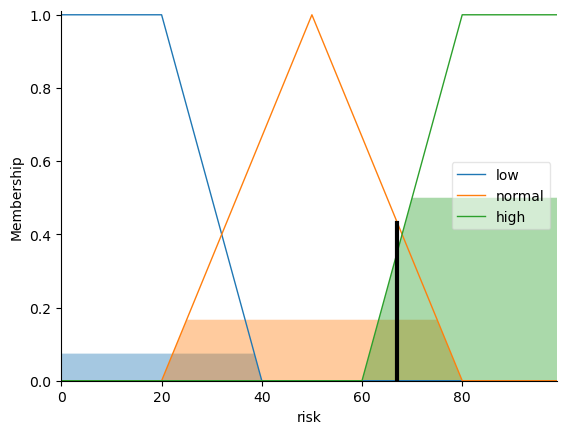

In [30]:
print(project_risk.output['risk'])
risk.view(sim=project_risk)